In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

import statsmodels.formula.api as sm

In [2]:
df = pd.read_excel('C:\\Users\\Dell\\Downloads\\Concrete_Data.xls')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

### Taking a peek at the relationship between the predicting variables and the response

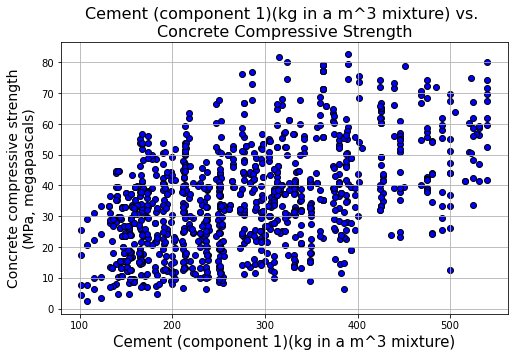

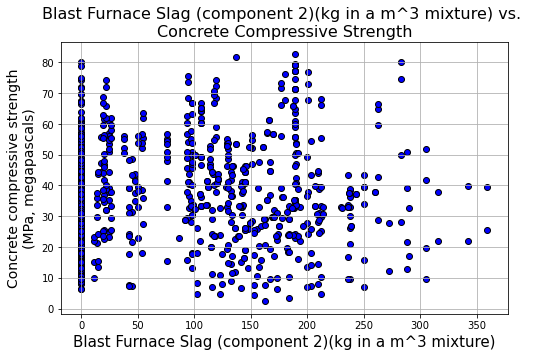

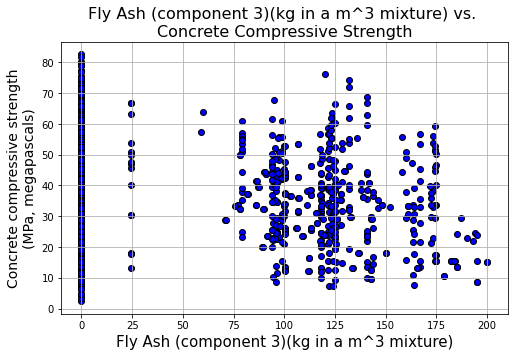

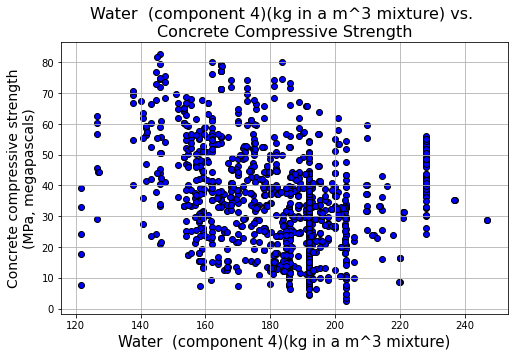

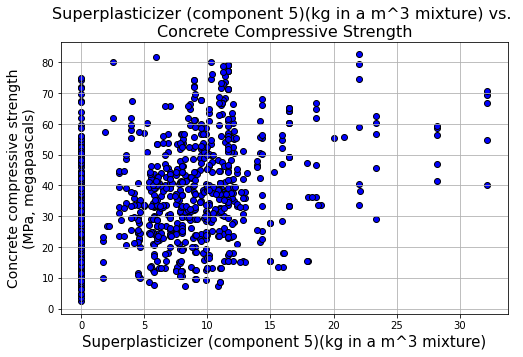

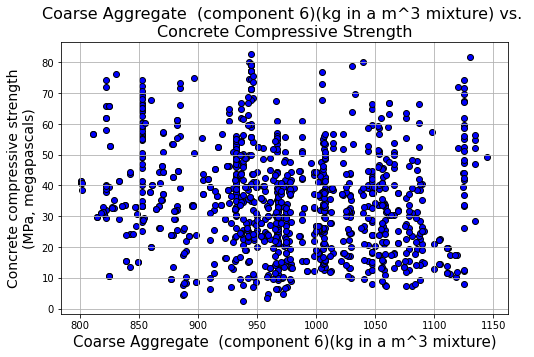

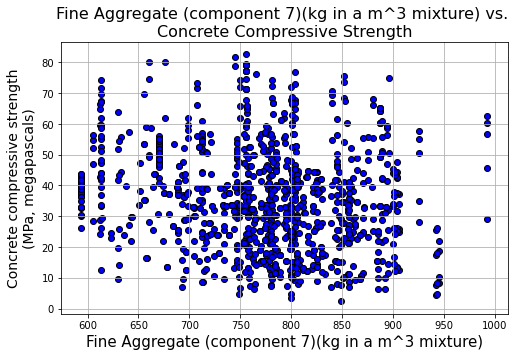

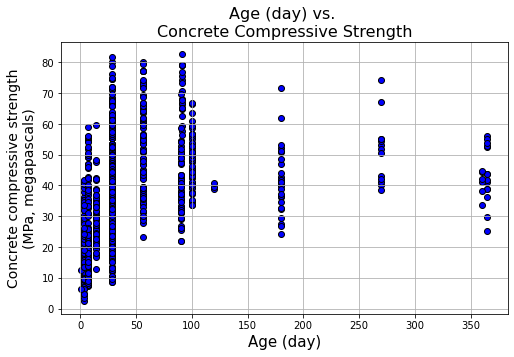

In [4]:
for c in df.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title('{} vs. \nConcrete Compressive Strength'.format(c), fontsize=16)
    plt.scatter(x=df[c], y=df['Concrete compressive strength(MPa, megapascals) '], color='blue', edgecolor='k')
    plt.grid(True)
    plt.xlabel(c, fontsize=15)
    plt.ylabel('Concrete compressive strength\n(MPa, megapascals)', fontsize=14)
    plt.show()

In [5]:
#We can observe from the graphs above that there is no linear relationship between the variables and we can check the 
#assumption of linearity from the same. 


In [6]:
df1 = df.copy(deep=True)

In [7]:
df1.columns = ['Component' +str(i) for i in range(1,8)]+['Age']+['target']

## Pairwise Scatter Plots

In [8]:
from seaborn import pairplot

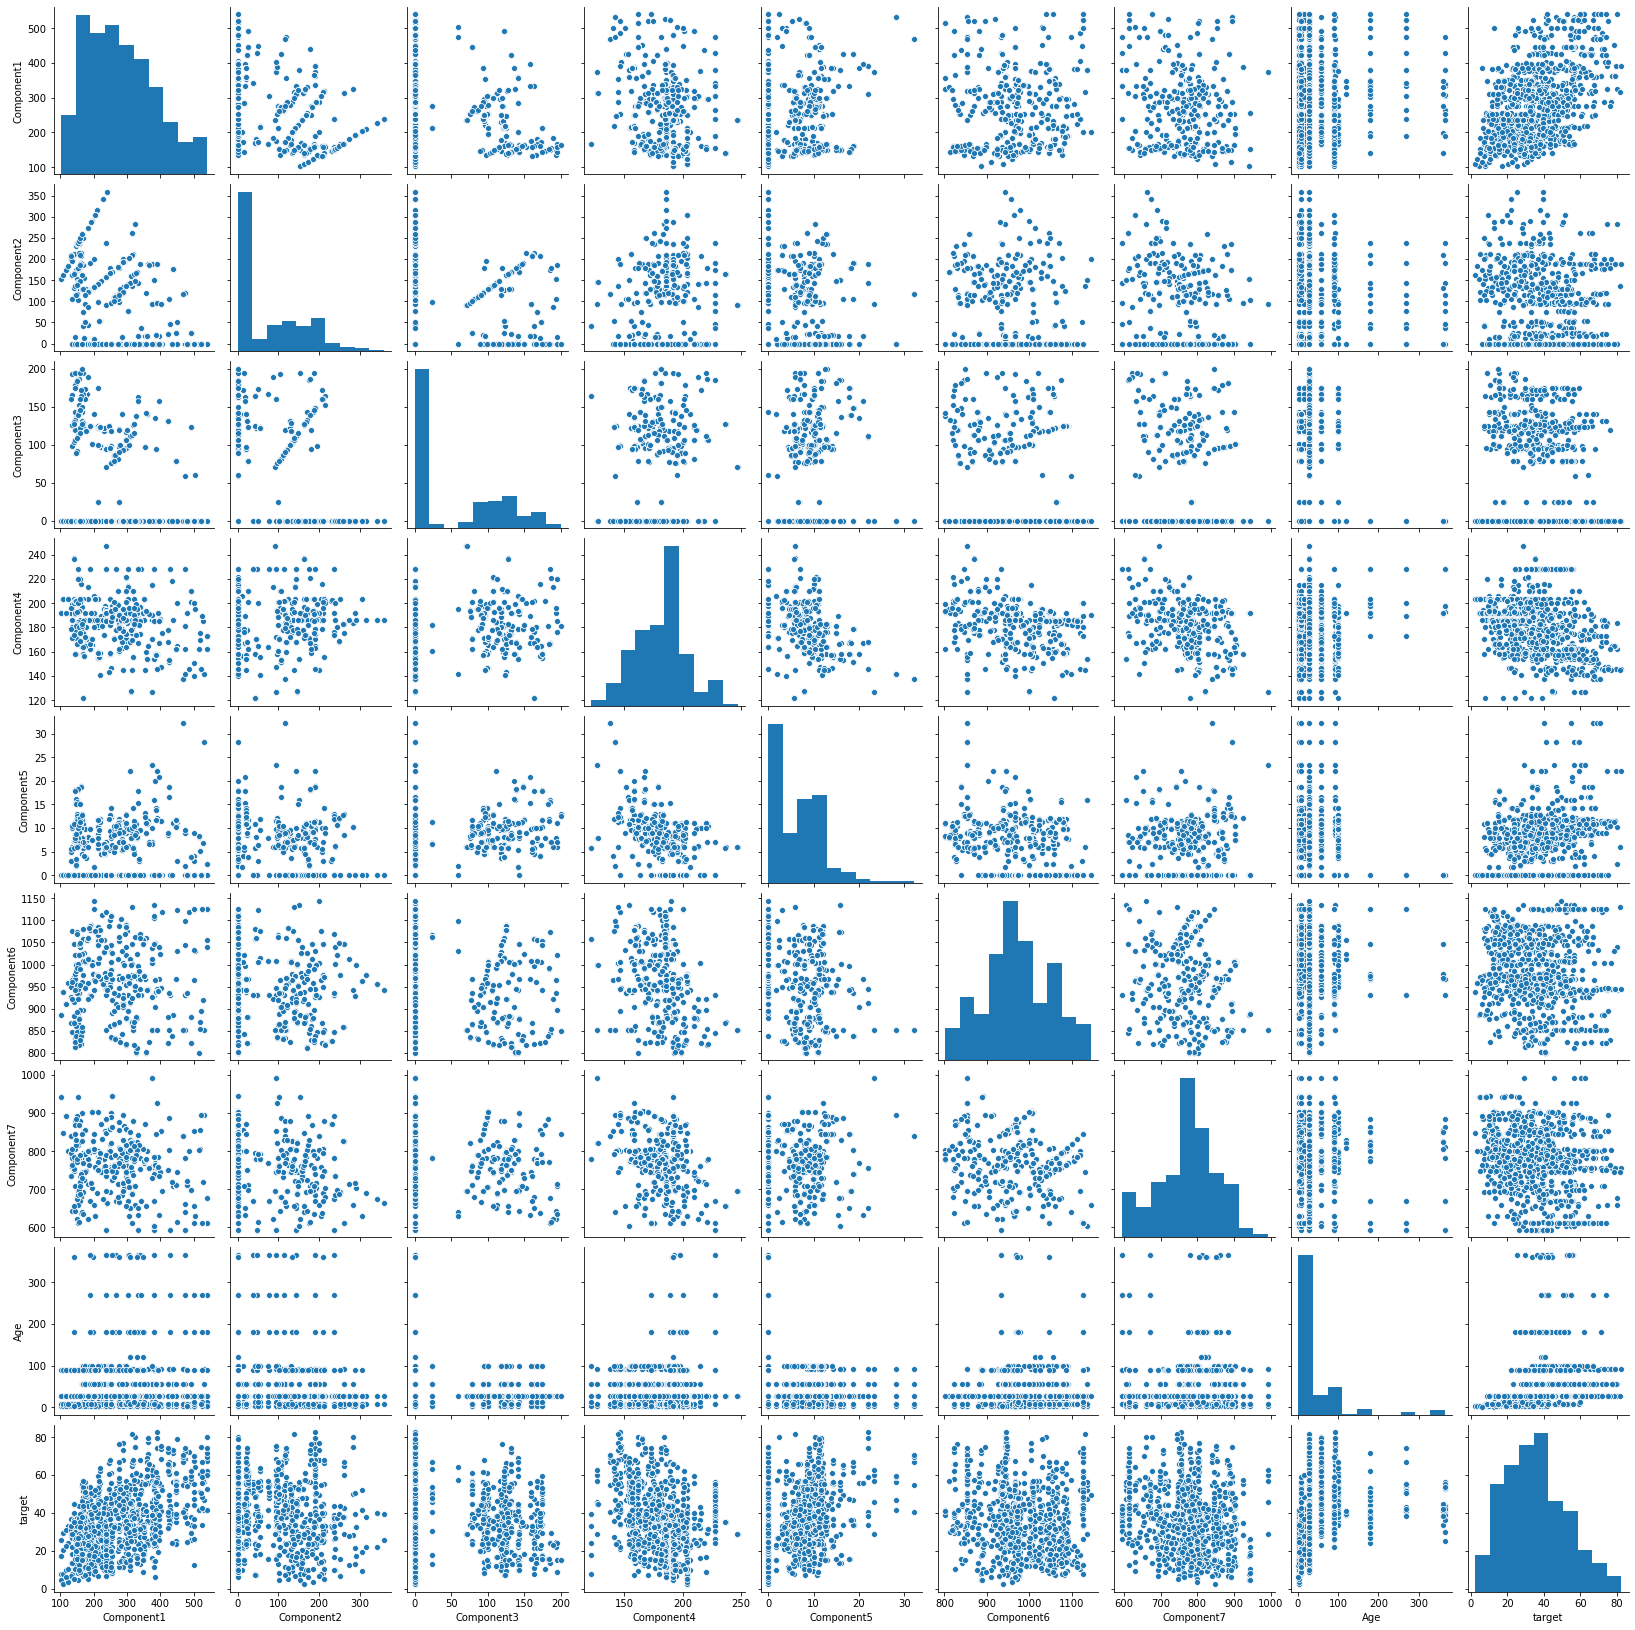

In [9]:
pairplot(df1)

# Checking Multicollinearity

In [10]:
corr = df1[:-1].corr()

(9.5, -0.5)

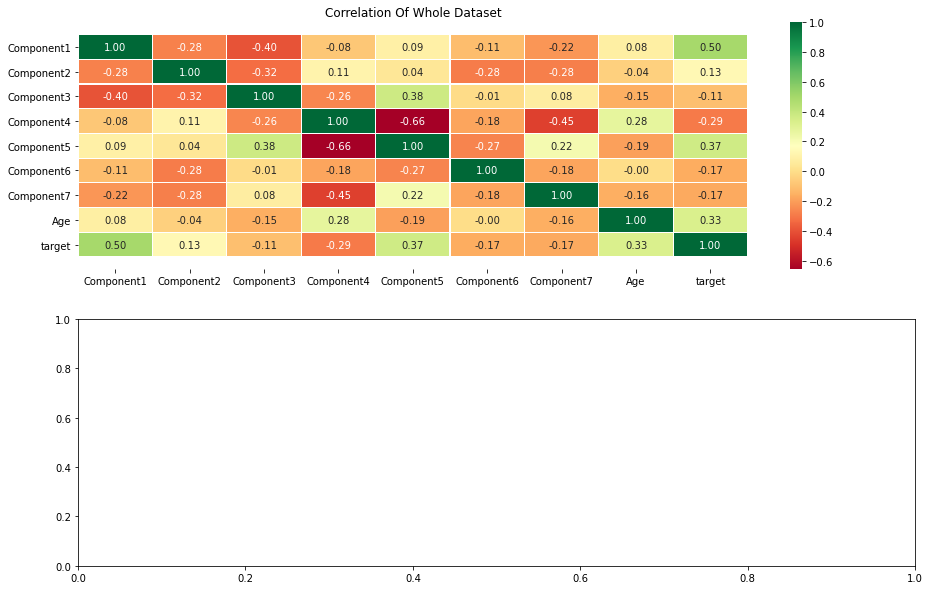

In [11]:
fig, ax = plt.subplots(2,1,figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='RdYlGn',linewidths=0.2, fmt='.2f', ax=ax[0])
ax[0].set_title('Correlation Of Whole Dataset')
bottom ,top = ax[0].get_ylim()
ax[0].set_ylim(bottom + 0.5, top - 0.5)

In [12]:
#Constructing the OLS Model

formula_str = df1.columns[-1] + '~' + '+'.join(df1.columns[:-1])
model = sm.ols(formula=formula_str, data=df1)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          6.76e-206
Time:                        15:50:13   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -23.1638     26.588     -0.871      0.3

In [13]:
df_result = pd.DataFrame()
df_result['pvalues'] = fit.pvalues[1:]
df_result['Features'] = df.columns[:-1]
df_result.set_index('Features', inplace=True)


def yes_no(b):
    if b:
        return 'yes'
    else:
        return 'no'

In [14]:
df_result['Statistically significant?']= df_result['pvalues'].apply(yes_no)

In [15]:
df_result
#All the predicting variables are statisticall significant with the threshold of p-value <0.01

,pvalues,Statistically significant?
Features,,
Cement (component 1)(kg in a m^3 mixture),1.962842e-41,yes
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1.633083e-23,yes
Fly Ash (component 3)(kg in a m^3 mixture),5.029952e-12,yes
Water (component 4)(kg in a m^3 mixture),1.937337e-04,yes
Superplasticizer (component 5)(kg in a m^3 mixture),1.920901e-03,yes
Coarse Aggregate (component 6)(kg in a m^3 mixture),5.522656e-02,yes
Fine Aggregate (component 7)(kg in a m^3 mixture),5.996805e-02,yes
Age (day),5.841045e-82,yes


# Residuals vs predicting variables Plots

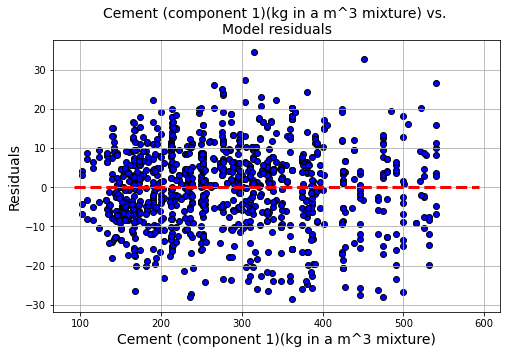

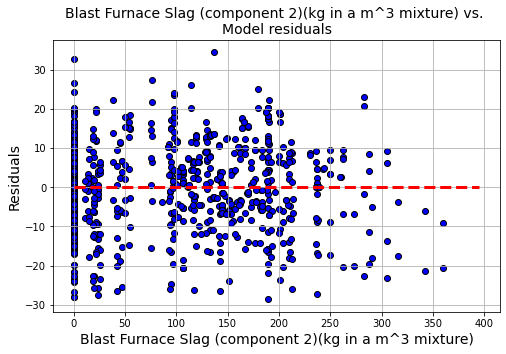

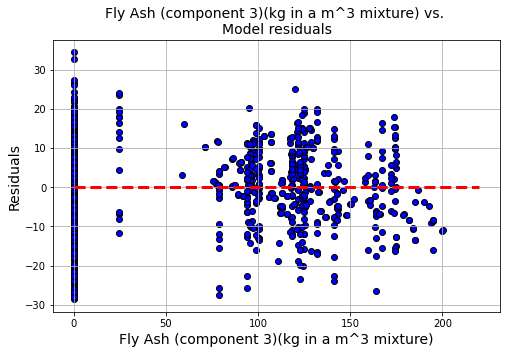

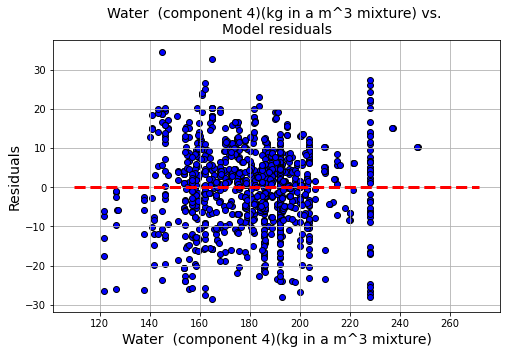

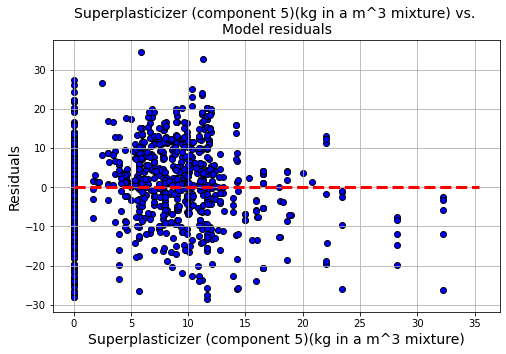

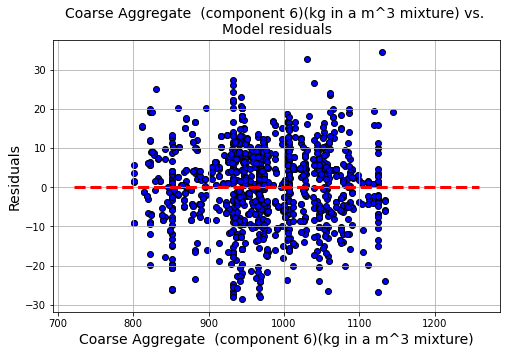

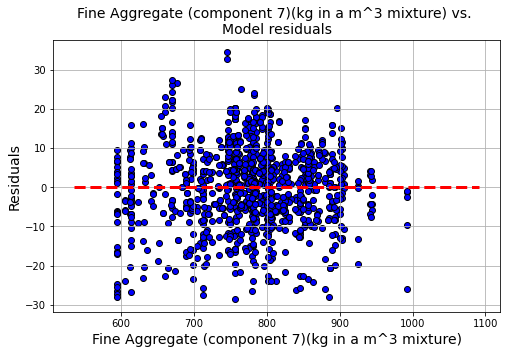

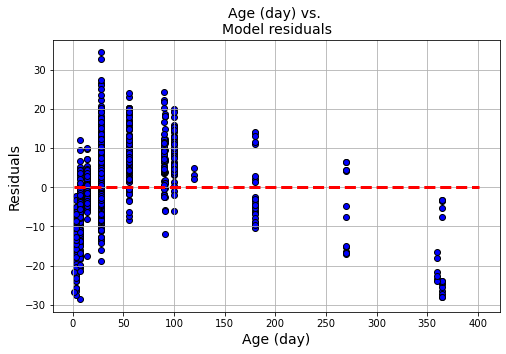

In [16]:
for c in df.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title('{} vs. \nModel residuals'.format(c), fontsize=14)
    plt.scatter(x=df[c], y=fit.resid, color='blue', edgecolor='k')
    plt.grid(True)
    xmin = min(df[c])
    xmax = max(df[c])
    plt.hlines(y=0, xmin=xmin*0.9, xmax=xmax*1.1, color='red', linestyle='--', lw=3)
    plt.xlabel(c, fontsize=14)
    plt.ylabel('Residuals',fontsize=14)
    plt.show()

In [17]:
##Residual plots show some bit of clustering but overall the assumptions linearity and independence seem to hold because 
#the distribution seem random around the 0 axis.

# Fitted Vs Residuals Plot

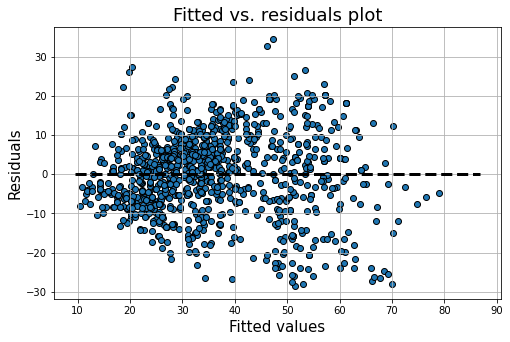

In [18]:
plt.figure(figsize=(8,5))
p = plt.scatter(x=fit.fittedvalues, y=fit.resid, edgecolor='k')
xmin = min(fit.fittedvalues)
xmax = max(fit.fittedvalues)
plt.hlines(y=0, xmin=0.9*xmin, xmax=1.1*xmax, linestyle='--', lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

In [19]:
##When we plot the fitted response values (as per the model) vs. the residuals, we clearly observe that the variance
##of the residuals increases with response variable magnitude. Therefore, the problem does not respect homoscedasticity 
##and some kind of variable transformation may be needed to improve model quality.

# Histogram of normalized residuals

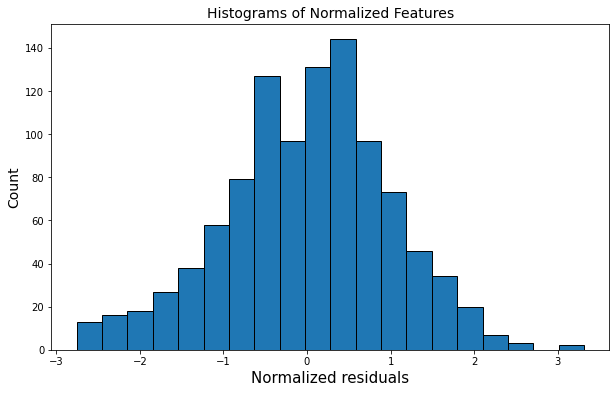

In [20]:
plt.figure(figsize=(10,6))
plt.hist(fit.resid_pearson, bins=20, edgecolor='k')
plt.ylabel('Count', fontsize=14)
plt.xlabel('Normalized residuals', fontsize=15)
plt.title('Histograms of Normalized Features', fontsize=14)
plt.show()

<Figure size 864x720 with 0 Axes>

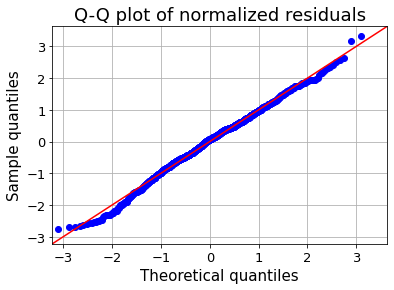

In [21]:
from statsmodels.graphics.gofplots import qqplot 

plt.figure(figsize=(12,10))
qqplot(fit.resid_pearson, line='45', fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

In [22]:
##The Q-Q plot (and the histogram above) shows that the normality assumption is satisfied pretty good

## Normality (Shapiro-Wilk) test of the residuals¶

##### The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution. The test gives you a W value; small values indicate your sample is not normally distributed (you can reject the null hypothesis that your population is normally distributed if your values are under a certain threshold). The formula for the W value is:

In [23]:
from scipy.stats import shapiro

In [30]:
_,p = shapiro(fit.resid)

In [32]:
if p<0.01:
    print("The residuals seem to come from Gaussian process")
else:
    print("The normality assumption may not hold")

The residuals seem to come from Gaussian process


## Cook's distance (checking for outliers in residuals)

#### Cook’s distance, Di, is used in Regression Analysis to find influential outliers in a set of predictor variables. In other words, it’s a way to identify points that negatively affect your regression model. The measurement is a combination of each observation’s leverage and residual values; the higher the leverage and residuals, the higher the Cook’s distanc

In [33]:
from statsmodels.stats.outliers_influence import OLSInfluence as influence

In [34]:
inf = influence(fit)

<ipython-input-35-15ede21e5c60>:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(c)), c, markerfmt=",")


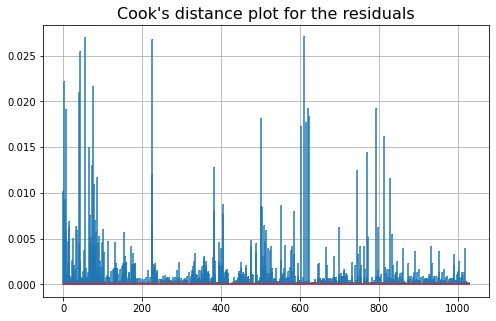

In [35]:
(c, p) = inf.cooks_distance
plt.figure(figsize=(8,5))
plt.title("Cook's distance plot for the residuals",fontsize=16)
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.grid(True)
plt.show()

In [36]:
#There are few data points with residuals with possible outliers

## Variance Inflation Factor

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [39]:
for i in range(len(df1.columns[-1])):
    v = vif(np.matrix(df1[:-1]), i)
    print("Variance inflation factor for {}: {}".format(df.columns[i],round(v,2)))

Variance inflation factor for Cement (component 1)(kg in a m^3 mixture): 26.23
Variance inflation factor for Blast Furnace Slag (component 2)(kg in a m^3 mixture): 4.44
Variance inflation factor for Fly Ash (component 3)(kg in a m^3 mixture): 4.56
Variance inflation factor for Water  (component 4)(kg in a m^3 mixture): 92.59
Variance inflation factor for Superplasticizer (component 5)(kg in a m^3 mixture): 5.52
Variance inflation factor for Coarse Aggregate  (component 6)(kg in a m^3 mixture): 85.97


In [40]:
#There are few features with VIF > 10, thereby indicating significant multicollinearity